###  Trabajo proyecto final IIQ2003

## Transporte de contaminantes en piscinas mineras

#### Ecuación de Richards

La ecuación de acumulación volumetrica esta dada por:

$$ \frac{\partial \theta}{\partial t} = 
\frac{\partial}{\partial z} 
\left[
K \left( \frac{\partial h}{\partial z} + 1 \right)
\right] $$

Donde $\theta$ es el contenido volumétrico de agua, K la conductividad hidráulica, h la cabeza de presión y z la coordenada vertical.


#### Ecuación de Transporte de Soluto

$$ 
\frac{\partial (\theta C)}{\partial t} =
\frac{\partial}{\partial z}
\left(
\theta D \frac{\partial C}{\partial z}
\right)
- q \frac{\partial C}{\partial z}
$$


#### Ecuaciones de Van Genuchten 

$$
\theta(h) = 
\begin{cases}
\theta_r + 
\dfrac{\theta_s - \theta_r}{\left[1 + |\alpha h|^n \right]^m}, & h < 0 \\
\theta_s, & h \geq 0
\end{cases}
$$

Obtenemos derivando el término $C(h)$
$$
\frac{\partial \theta}{\partial h} =
\frac{(- \alpha h)^{n}(1+(- \alpha h )^n)^{-1-m} \,m \cdot n \cdot(\theta_r-\theta_s) }{h}
$$

#### Conductividad Hidraulica

$$
K(h) = 
\begin{cases}
K_s S_e^l 
\left[1 - \left(1 - S_e^{1/m}\right)^m
\right]^2, & h < 0 \\
K_s, & h \geq 0
\end{cases}
$$


### Parte 1) 
### 1.1 Discretización de las ecuaciones


### Ecuación de Richards


Forma explícita de Richards en el cabezal de presión

$$
C(h)\frac{\partial h}{\partial t} = 
\frac{\partial}{\partial z} 
\left[
K(h) \left( \frac{\partial h}{\partial z} + 1 \right)
\right]
$$

Luego discretizando cada término

$$
C_{i}^j \frac{h_{i}^{j+1} - h_{i}^{j}}{\Delta t}
= - \left(\frac{q_{i +\frac{1}{2}}^{j+1} - q_{i -\frac{1}{2}}^{j+1} }{\Delta z} \right)
$$

Los parámetros asociados al flujo de la propiedad $h$ (el cabezal de presión)

$$
K_{i + \frac{1}{2}}^j =\frac{K_{i+1}^j + K_{i}^j}{2}, \qquad K_{i - \frac{1}{2}}^j =\frac{K_{i}^j + K_{i-1}^j}{2}
$$

$$
q_{i +\frac{1}{2}}^{j+1} = -K_{i + \frac{1}{2}}^j \left( \frac{h_{i+1}^{j+1} -h_{i}^{j+1}}{\Delta z} + 1 \right), \qquad q_{i -\frac{1}{2}}^{j+1} = -K_{i - \frac{1}{2}}^j \left( \frac{h_{i}^{j+1} -h_{i-1}^{j+1}}{\Delta z}+1 \right)
$$

#### Formulación de la matriz para resolver el sistema lineal  $A\bf{h}^{j+1}= rhs$

Denotando

$$
\alpha= -\,\frac{\Delta t}{\Delta z^2}\,K_{i-1/2}^j,
$$

$$
\beta = C_i^j
+
\frac{\Delta t}{\Delta z^2}\big( K_{i-1/2}^j + K_{i+1/2}^j \big),
$$

$$
\gamma = -\,\frac{\Delta t}{\Delta z^2}\,K_{i+1/2}^j,
$$

$$
\mathrm{rhs}
=
C_i^j\, h_i^{j}
+
\frac{\Delta t}{\Delta z}\big( K_{i+1/2}^j - K_{i-1/2}^j \big).
$$

El sistema pseudo-lineal queda:

$$
\alpha h_{i-1}^{j+1}
+ \beta h_i^{j+1}
+ \gamma h_{i+1}^{j+1}
= \mathrm{rhs}
$$

#### Ecuación de transporte de soluto
De la ecuación de conservación
$$
\theta_i \frac{C_i^{j+1} - C_i ^{j}}{\Delta t} = - \frac{J_{i +\frac{1}{2}}^{j+1} - J_{i -\frac{1}{2}}^{j+1}  }{\Delta z}
$$

$$
J_{i +\frac{1}{2}}^{j+1} = -\theta_{i+\frac{1}{2}} D_{i+\frac{1}{2}}\frac{C_{i+1}^{j+1} - C_i ^{j+1} }{\Delta z} + q_{conv} \cdot C_i^{j+1}, \qquad J_{i -\frac{1}{2}}^{j+1} = -\theta_{i-\frac{1}{2}} D_{i-\frac{1}{2}}\frac{C_{i}^{j+1} - C_{i-1} ^{j+1} }{\Delta z} + q_{conv} \cdot C_{i-1}^{j+1}
$$
Con $q_{conv}$ el caudal promedio en la columna de control, y para que la difusividad sea consistente con los datos experimentales.

$$
\theta_{i+\frac{1}{2}} = \frac{\theta_i + \theta_{i+1}}{2}, \qquad \theta_{i+\frac{1}{2}} = \frac{\theta_i + \theta_{i-1}}{2}, \qquad  D_{i+\frac{1}{2}}=D_{i-\frac{1}{2}} = D_L|q_{conv}|
$$

#### Formación de la matriz $A\bf{C}^{j+1} = rhs$


$$
a_i=\frac{\theta_{i-\frac{1}{2}} D_{i-\frac{1}{2}}}{\Delta z^2}+\frac{q}{\Delta z}
$$

$$
b_i=-\frac{\theta_{i+\frac{1}{2}} D_{i+\frac{1}{2}} + \theta_{i-\frac{1}{2}} D_{i-\frac{1}{2}}}{\Delta z^2}-\frac{q}{\Delta z}.
$$

$$
c_i=\frac{\theta_{i+\frac{1}{2}} D_{i+\frac{1}{2}}}{\Delta z^2}
$$


$$
-\,a_i\, C_{i-1}^{\,n+1}+\left(\frac{\theta_i}{\Delta t} - b_i\right) C_i^{\,n+1}-c_i\, C_{i+1}^{\,n+1}=\frac{\theta_i}{\Delta t}\, C_i^{\,n}.
$$


### Condiciones de borde
- Condicion inicial $t=0$, $CI$:
$$
\theta(z,0) = \theta_0 = 0.10 \text{cm}^3/\text{cm}^3  \implies h(0,z) = h_0 
$$

- Borde superior $z = 0$ hay flujo impuesto, $CB_1$:

$$
q(t) = q_0 = 13.69 \text{cm/h} \implies q_{\frac{1}{2}} = - q_0
$$

- Borde inferior $z = L$, el cabezal de presion se mantiene constante en el fondo del relave (capa permeable), $CB_2$

$$
h(L, t) = h_{borde} = h_0
$$

- Concentración borde superior $z=0$ (agua trae concentración fija), $CB_3$

$$
C(0,t) = C_{\text{top}}.
$$

- Borde inferior contaminante sale con el agua (solo convección), $CB_4$

$$
\left.\frac{\partial C}{\partial z}\right|_{z=L} = 0
$$

### 1.2 Discretización condiciones de borde
- $CB_1$:

$$
C_0^j \frac{h_0^{j+1} - h_0^j}{\Delta t} = - \frac{q_{1/2}^{j+1} - q_0}{\Delta z}
$$


- $CB_2$:

$$
h_{N-1}^{j+1} = h_{fondo}
$$

- $CB_3$

$$
C_0^{\,n+1} = C_{\text{top}}.
$$


- $CB_4$
$$
\frac{C_{N-1}^{\,n+1} - C_{N-2}^{\,n+1}}{\Delta z} = 0 \quad\Longrightarrow\quad C_{N-1}^{\,n+1} = C_{N-2}^{\,n+1}.
$$


###  2) Definición de Datos


#### 2.1 importar módulos

In [121]:
import numpy as np
import matplotlib.pyplot as plt
# Mapas de colores
from matplotlib import cm

#### 2.2 Declaración de parámetros físicos

In [122]:
# propiedades fisicas de transporte de momentum (Richards / Van Genuchten )
ths   = 0.38                 # θ_s, contenido volumétrico de agua saturado (todos los poros llenos)
thr   = 0.05                 # θ_r, contenido volumétrico de agua residual (agua que queda atrapada en poros)
n_par = 1.6                  # Adimensional, parámetros de a curva de retención
m_par = 1.0 - 1.0/n_par      # Adimensional, parámetros de a curva de retención
l_par = 0.5                  # parámetro de tortuosidad l

#Conductividad hidraulica saturada
K_s   = 30                    # K_s [cm/h]
alpha = 0.03                  # [cm^-1] , parámetro de la curva de retención

# longitud columna 
L  = 70.0                    # [cm], altura de la zona no satura del relave
 
# Contenido volumetrico de agua inicial
theta_0 = 0.12               # cm^3/cm^3

#Cabezal de presión inicial h(z,0) calculado a partir de la inversa de Ec. Van Genuchten [cm]
h0 = - ( (-1+ ( (-thr+ths)/(theta_0 - thr) )**(1/m_par) )**(1/n_par))/(alpha)

#Borde inferior Z = L, h(L,t)
h_fondo = h0                # cm 

#flujo de entrada en Z = L
q0_water = 0.23             # cm/ h  calculado a partir de precipitacion promedio en aysén duran 3 meses en invierno 497.5 mm/3meses 
                            # se convierten unidades.

#Transporte de soluto (Adversión y dispersión)
# dispersividad longitudinal 
D_L = 8                    # [cm]

# concentración de entrada (para C/C0)
C0  = 1.0                  # mol/m^3

#Concentracion inicial de contaminantes
C0_Zn = 10.0   # mg/L
C0_Pb = 0.5    # mg/L

# velocidad media de advección del trazador [cm/h], se escoge para que C se mueva en la escala de tiempo de estudio
q_adv_tracer = 0.23  # [cm/h] igual al del caudal impuesto 


#### 2.3 Definición de los parámetros de grilla y computacionales

Se le solicita resolver el problema considerando los siguientes parámetros:

* 100 nodos en la dirección radial


In [123]:
# Número de nodos
N = 100

# Dominio de la malla (0=fondo, L=superficie)
z_phys = np.linspace(0.0, L, N)

# Espaciamiento
dz = L/(N-1)


### 3) Definir funciones necesarias para aplicar el método númerico

In [124]:
#Esta función entrega los paramétros del problema necesario a usar en cada función
def setpars():
    p = {}
    p['ths']    = ths
    p['thr']    = thr
    p['alpha']  = alpha
    p['n']      = n_par
    p['m']      = m_par
    p['l']      = l_par
    p['K_s']    = K_s
    p['dz']     = dz
    
    return p    #retorna todos los parametros

#### 3.1 Ecuaciones de Van Genuchten

In [125]:
#recibe el valor h del nodo actual para calcular el valor actual de θ, y de p = params (función de set pars)
def theta_vg(h, p):
    ths   = p['ths']
    thr   = p['thr']
    alpha = p['alpha']
    n_par = p['n']
    m_par = p['m']

    h = np.array(h, dtype=float) # Para trabjar con numpy, float para que no haya problemas de inestabilidad (trabajar con reales)
    th = np.empty_like(h)        # Para después llenar ccon los valores de θ

    nosat = h < 0.0     # True cuando h < 0, suelo no saturado 
    hu = -h[nosat]      # Toma los valores de h < 0, el menos es porque van genuchten ya considera el signo (con el valor absoluto)
    hu = np.clip(hu, 0.0, 1e4)  # Restricción para 0 - 10000 cm de cabezal de presión (evitar inestabilidad númerica)

    X  = 1.0 + (alpha * hu)**n_par  # denominador del VG para h < 0 (se escribe así para achicar la ec y trabajar por partes)
    Se = X**(-m_par)      # Aca se invierte

    th[nosat]  = thr + (ths - thr) * Se  # θ(h<0)
    th[~nosat] = ths     # θ(h>=0)
    
    return th #retorna el valor del nodo actual de θ

#### 3.2 Conductividad hidraulica

In [126]:
#Calcula la conductividad hidráulica
def K_vg(h, p):
    K_s   = p['K_s']
    l_par = p['l']
    alpha = p['alpha']
    n_par = p['n']
    m_par = p['m']

    h = np.array(h, dtype=float)
    K = np.empty_like(h)         # Para después llenar con los valores de K 

    nosat = h < 0.0              # True se h < 0 
    hu = -h[nosat]
    hu = np.clip(hu, 0.0, 1e4)  

    X  = 1.0 + (alpha * hu)**n_par
    Se = X**(-m_par)

    K_unsat = K_s * Se**l_par * (1.0 - (1.0 - Se**(1.0/m_par))**m_par)**2  # EC de conductividad hidraulica para h < 0 
    K[nosat]  = K_unsat          # Agrega el valor de  K si es no saturado h < 0 
    K[~nosat] = K_s              # Argega el valor de K si es saturado h >= 0
    return K      # Retorna la conductividad hidráulica

#### 3.3 Cálculo de $\theta$, C y K 

In [127]:
def cal_th_C_K(h, p):
    th = theta_vg(h, p)

    eps = 1e-3   # Valor pequeño para aproximar dθ/dh
    th_p = theta_vg(h + eps, p)   # Se toma un gradiente muy pequeño en + Delta θ
    th_m = theta_vg(h - eps, p)   # Se toma un gradiente muy pequeño en - Delta θ
    C = (th_p - th_m) / (2.0 * eps)  # Se calcula el paso (diferencias Centrales) (Aquí se cambió mi fórmula de latex por inestabilidad númerica)
    C = np.clip(C, 1e-6, None)       # Restringe que sea positivo
    K = K_vg(h, p) 
    
    return th, C, K   # Retorna un array θ, C(h), K(h)

#### 3.4 Definir función para rellenar matriz A - Backward Euler (Richards) 
Para Poder usar Backward euler, congelaremos los términos no lineales en el paso temporal anterior $j$ por medio de picard en un solo paso. Por ello debemos tener en cuenta la discretizacion de las ecuaciones y las condiciones de borde realizadas en 1.1 y 1.2.

Luego resolveremos el sistema lineal para $h^{j+1}$



In [128]:
# Construye A y rhs para Backward Euler: A * h^{n+1} = rhs para flujo (momentum)
def build_A_rhs_flow(h, params, q0, dt, h_fondo): # h^j, parametros, flujo impuesto q0, dt, h_fondo
    dz = params['dz']
    th, C, K = cal_th_C_K(h, params)  # desempacamos  θ, C(h), K(h)

    N = len(h)
    K_face = 0.5 * (K[:-1] + K[1:])   # Flujo entre caras en K_{i+1/2} ej: 0.5(K_1 + K_0) ... 0.5(K_N + K_{N-1}) (Es un array para cada nodo)
 
    A   = np.zeros((N, N))   # Armamos la matriz de coeficientes de h^{j+1}
    rhs = np.zeros(N)        # Lado derecho de la ecuación lineal

    # Nodo superior (superficie, flujo q0 hacia abajo)
    C0_  = C[0]   # C(h_0)
    K12 = K_face[0]  # K_{1/2} conductividad entre nodo 0 y 1 

    #Condición de lluva CB1, se reemplaza q0 = q_{-1/2} y se despeja de la condicion de borda hasta llegar al Ah =rhs
    A[0, 0] = C0_ + dt * K12 / dz**2   # mutiplica h_0^{j+1}
    A[0, 1] = - dt * K12 / dz**2       # mutiplica h_1^{j+1}
    rhs[0]  = C0_ * h[0] + dt * (K12 + q0) / dz # Términos conocidos (paso anterior)

    # Nodos interiores
    for i in range(1, N-1):
        Ci  = C[i]         # C(h_i) 
        Kim = K_face[i-1]  # K_{i-1/2}
        Kip = K_face[i]    # K_{i+1/2}

        A[i, i-1] = - dt * Kim / dz**2                   # α
        A[i, i]   =  Ci + dt * (Kim + Kip) / dz**2       # β
        A[i, i+1] = - dt * Kip / dz**2                   # γ 

        rhs[i] = Ci * h[i] + dt * (Kip - Kim) / dz       # rhs

    # Nodo inferior (fondo, Dirichlet en h) CB2 
    A[-1, :]  = 0.0
    A[-1, -1] = 1.0
    rhs[-1]   = h_fondo

    return A, rhs, th   # Retonramos A, rhs y th para luego usar solución lineal (theta lo usamos para el transporte de masa)

#### 3.5 Transporte de soluto - Backward Euler

In [129]:
# d(θC)/dt = -dJ/dz, J = -θ D dC/dz + q_adv C_up   
# C_old: C^{j} concentracion del nodo anterior (NO CONFUNDIR CON C(h))
# theta_rich: theta en cada nodo calculada con richards
# Parámetros
def build_A_rhs_transport(C_old, theta_rich, dz, dt, D_L, C_top, q_conv):  

    N = len(C_old)            # Nro de nodos
    A   = np.zeros((N, N))    # Matriz de coeficientes de C_i^{j+1}
    rhs = np.zeros(N)

    # Dirichlet C = C_top, Concentración en la superficie CB3
    A[0, 0] = 1.0
    rhs[0]  = C_top

    # Nodos interiores 
    for i in range(1, N-1):
        theta_i = theta_rich[i]

        q_minus = q_conv   # q_adv en i - 1/2
        q_plus  = q_conv   # q_adv en i + 1/2

        D_minus = D_L * abs(q_minus)  # cara en i - 1/2
        D_plus  = D_L * abs(q_plus)   # cara en i + 1/2

        theta_minus = 0.5 * (theta_rich[i-1] + theta_rich[i])    # θ_{i - 1/2}
        theta_plus  = 0.5 * (theta_rich[i]   + theta_rich[i+1])  # θ_{i + 1/2}

        # Coefs de flujo (Flujo de arriba hacia abajo con q>0)
        a = (theta_minus * D_minus / dz**2) + (q_minus / dz)                            # a_i
        b = - (theta_plus * D_plus + theta_minus * D_minus) / dz**2 - q_plus / dz       # b_i
        c = (theta_plus  * D_plus  / dz**2)                                             # c_i

        # Se completan con los coeficientes como el discretizado.
        A[i, i-1] = -a                # C_{i-1}^{j+1}
        A[i, i]   = theta_i/dt - b    # C_{i}^{j+1}
        A[i, i+1] = -c                # C_{i+1}^{j+1}

        rhs[i] = theta_i * C_old[i] / dt  #rhs (lado derecho)

    # Neumann dC/dz = 0 => C_N-1 = C_N-2 
    A[-1, -1] = 1.0
    A[-1, -2] = -1.0
    rhs[-1]   = 0.0

    return A, rhs     # Retorna para luego resolver AC^{j+1} = rhs

#### 3.6 Bucle de simulación acoplado

In [130]:
# acopla para cada tiempo Richards y Transporte de contaminantes, actualizando θ, h y C
def acoplar(t0, tmax, dt, write_int,params, q0_water, h_fondo, D_L, C0, q_adv_tracer):

    # Condición inicial en h en coordenada física (Vector de largo N, z=0 fondo y z = L)
    h_init_phys = np.ones(N) * h0

    # Convertir a convención numérica (0=superficie)
    h = h_init_phys[::-1].copy()  # Invierte para que z=0 sea superficie z= L fondo
    t = t0 

    # Concentración inicial de soluto: 0 en todos lados
    C = np.zeros(N)

    t_vec = [t0]               # Lista que guarda tiempos de resultados (parte con t0)
    h_hist_num = [h.copy()]    # Lista de h (sin invertir nodos)
    C_hist_num = [C.copy()]    # Lista de C (sin invertir nodos, concentración)
    theta_hist_num = []        # Lista vacía donde se va a guardar θ(h)

    # θ inicial consistente con h
    theta_nodes, _, _ = cal_th_C_K(h, params)   # θ(h), el resto no nos importa
    theta_hist_num.append(theta_nodes.copy())   # Guarda θ inicial en t0

    save_resultado = t0 + write_int   # Cada cuanto se guardan los resultados (Se escoge write_interval grande por tiempo y costo computacional)

    while t < tmax - 1e-12:    # Avanza en el tiempo hasta tmax -1e-12 es para evitar problemas de redondeo
        
        # 1) Flujo de agua (Richards)
        A_flow, rhs_flow, theta_nodes = build_A_rhs_flow(h, params, q0_water, dt, h_fondo) #Obtenemos la matriz para resolver Richards
        
        h_new = np.linalg.solve(A_flow, rhs_flow)    # Resolvemos el sistema lineal Ah^{j+1} = rhs
        h_new = np.clip(h_new, -1e6, 0.0)            # Restricción para evitar inestabilidad númerica y no explote Van Genuchten

        theta_nodes, _, _ = cal_th_C_K(h_new, params)  # Recalcula θ(h_new)

        # 2) Transporte de soluto con q_adv_tracer (flujo de convección/advección) constante
        A_tr, rhs_tr = build_A_rhs_transport(C, theta_nodes, dz, dt, D_L, C0, q_adv_tracer)  # llamamos A y rhs para soluto
        
        C_new = np.linalg.solve(A_tr, rhs_tr)     # Resolvemos el sistema lineal AC^{j+1} = rhs (notar que este A y rhs son distintos al de momemtum)
        C_new = np.clip(C_new, 0.0, C0)           # evitar valores negativos para concentración y mayores a la entrada (No tiene sentido físico)

        # avanzar en el tiempo, pasan a ser de tiempo j 
        h = h_new
        C = C_new
        t += dt

        if t >= save_resultado - 1e-12:
            t_vec.append(t)                                # Guarda tiempo j 
            h_hist_num.append(h.copy())                    # Guarda h en j
            C_hist_num.append(C.copy())                    # Guarda C en j 
            theta_hist_num.append(theta_nodes.copy())      # Guarda θ en j 
            save_resultado += write_int                    # Siguiente intervalo para guardar datos.

    #Convertir listas a array (para graficar)
    t_vec = np.array(t_vec)
    h_hist_num = np.array(h_hist_num)
    C_hist_num = np.array(C_hist_num)
    theta_hist_num = np.array(theta_hist_num)

    # Volver a coordenada física (0=fondo,L=superficie)
    h_hist_phys     = h_hist_num[:, ::-1]
    C_hist_phys     = C_hist_num[:, ::-1]
    theta_hist_phys = theta_hist_num[:, ::-1]

    return t_vec, h_hist_phys, C_hist_phys, theta_hist_phys       # Retorna los array de tiempo, h, C y θ. 


### 4) Ejecutar simulación

In [131]:
# Tiempo
dt        = 1.0                 # [h]
t_inicial = 0.0
t_max     = 24.0*7.0            # *** 7 días [h] ***
write_int = 24.0                # guardar cada 24 h

In [132]:
#Llamamos a los parámetros
params = setpars()

# Resolvemos los perfiles para h, C y θ para cada tiempo  
t_vec, h_hist, C_hist, theta_hist = acoplar(t_inicial, t_max, dt, write_int, params, q0_water, h_fondo, D_L, C0, q_adv_tracer)

print("Tiempos guardados:", len(t_vec))

# Profundidad: 0 en superficie, -L en fondo
depth = z_phys - L   # 0 (superficie), -70 (fondo) => en superficie L-L = 0, en fondo 0-L = -L

# Modelar una semana (7 Días)
dias_obj = np.arange(0, 8)     # array de [0,...,7]
horas_obj = dias_obj * 24.0    # días a horas

# Este bucle obtiene una lista de índices donde se encuentra el perfil más cercano usando el error relativo.
idx_plot = []
for hobj in horas_obj:
    idx = np.argmin(np.abs(t_vec - hobj))
    idx_plot.append(idx)

Tiempos guardados: 8


### 5) Graficar

#### 5.1 Gráfica adimensional de transporte de contaminantes en los suelos $C/C_0$

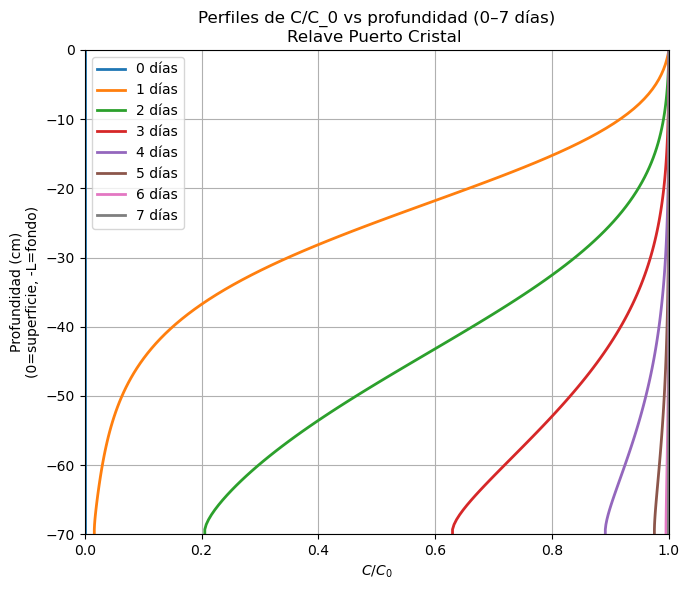

In [133]:
plt.figure(figsize=(7, 6))   # Crear figura 

#Hacemos un doble for para graficar C/C0 vs profundidad para cada día
#d indica dia, idx indice del vector t_vec guardado en idx_plot
for d, idx in zip(dias_obj, idx_plot): # zip empareja d con dias_obj y idx con idx_plot
    
    C_perfil = C_hist[idx] / C0                               # perfil de concentraciones en tiempo j 
    C_perfil = np.clip(C_perfil, 0.0, 1.0)                   # concentración puede estar solo entre 0 y 1 
    plt.plot(C_perfil, depth, lw=2, label=f"{int(d)} días")   # Graficar cada línea
#Notar que depth tiene el término z_phys, por lo que recorre cada nodo de la fila C_hist para un tiempo dado.

plt.xlabel(r"$C/C_0$ ")
plt.ylabel("Profundidad (cm)\n(0=superficie, -L=fondo)")
plt.title("Perfiles de C/C_0 vs profundidad (0–7 días)\nRelave Puerto Cristal ")
plt.grid(True)
plt.ylim(-70, 0)      # zoom en primeros 15 cm
plt.xlim(0.0, 1)   # ajuste para que se vea mejor
plt.legend()
"""
# Guardar Gráficos
plt.tight_layout() 
plt.savefig("perfil_CC0.svg", format="svg", dpi=300, bbox_inches="tight")
"""
plt.show()

#### 5.2 Gráfica de $C_{Zn}$ mg/L vs profundidad

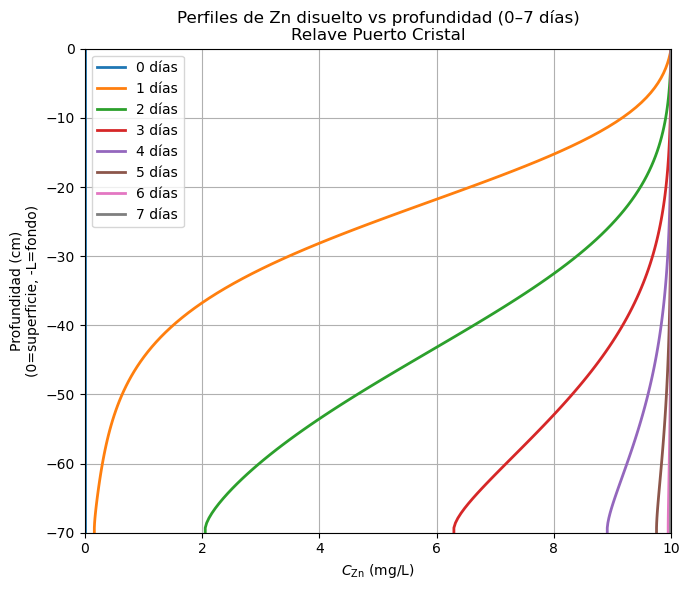

In [134]:
plt.figure(figsize=(7, 6))

for d, idx in zip(dias_obj, idx_plot):
    C_perfil = C_hist[idx] / C0       # C/C0
    C_Zn_perfil = C_perfil * C0_Zn    # multiplicamos C0 de Zn para dimensionar en mg/L
    C_Zn_perfil = np.clip(C_Zn_perfil, 0.0, C0_Zn)    # No puede haber concentraciones de Zn negativas ni mayores a la inicial 
    plt.plot(C_Zn_perfil, depth, lw=2, label=f"{int(d)} días") # Lo mismo que en 5.1

plt.xlabel(r"$C_{\mathrm{Zn}}$ (mg/L)")
plt.ylabel("Profundidad (cm)\n(0=superficie, -L=fondo)")
plt.title("Perfiles de Zn disuelto vs profundidad (0–7 días)\nRelave Puerto Cristal")
plt.grid(True)
plt.ylim(-70, 0)
plt.xlim(0.0, C0_Zn)  # Para enfocar bien el gráfico
plt.legend()
"""
# Guardar Gráficos
plt.tight_layout() 
plt.savefig("Zn_vs_profundidad.svg", format="svg", dpi=300, bbox_inches="tight")
"""
plt.show()


#### 5.3 Gráfica de $C_{Pb}$ mg/L vs profundidad

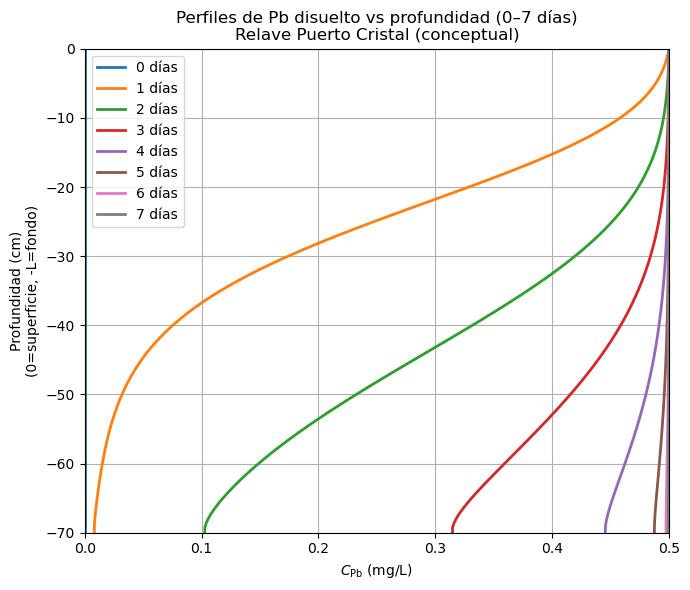

In [135]:
plt.figure(figsize=(7, 6))

for d, idx in zip(dias_obj, idx_plot):
    C_perfil = C_hist[idx] / C0        # C/C0
    C_Pb_perfil = C_perfil * C0_Pb    #  multiplicamos C0 de Pb para dimensionar en mg/L
    C_Pb_perfil = np.clip(C_Pb_perfil, 0.0, C0_Pb)  # No puede haber concentraciones de Pb negativas ni mayores a la inicial 
    plt.plot(C_Pb_perfil, depth, lw=2, label=f"{int(d)} días")

plt.xlabel(r"$C_{\mathrm{Pb}}$ (mg/L)")
plt.ylabel("Profundidad (cm)\n(0=superficie, -L=fondo)")
plt.title("Perfiles de Pb disuelto vs profundidad (0–7 días)\nRelave Puerto Cristal (conceptual)")
plt.grid(True)
plt.ylim(-70, 0)
plt.xlim(0.0, C0_Pb)  
plt.legend()
"""
# Guardar Gráficos
plt.tight_layout() 
plt.savefig("Pb_vs_profundidad.svg", format="svg", dpi=300, bbox_inches="tight")
"""
plt.show()

#### 5.4 Gráfica de la cantidad volumetrica de agua en los suelos

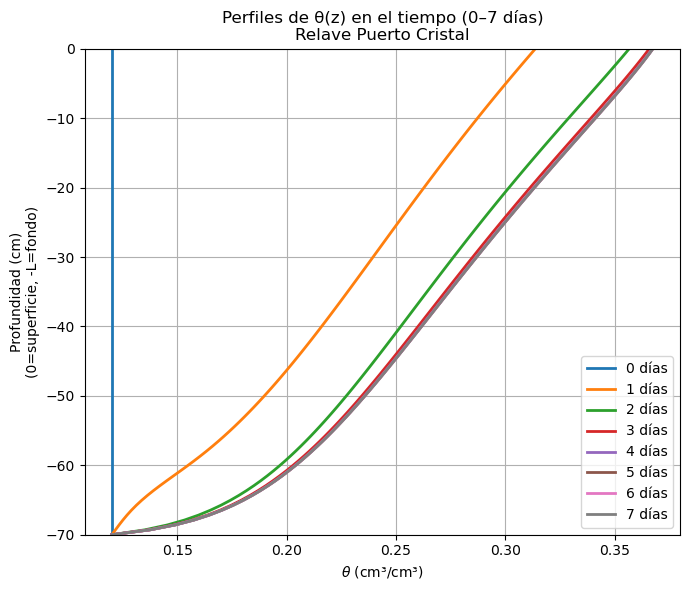

In [136]:
plt.figure(figsize=(7, 6))
for d, idx in zip(dias_obj, idx_plot):
    th_profile = theta_hist[idx]
    plt.plot(th_profile, depth, lw=2, label=f"{int(d)} días")

plt.xlabel(r"$\theta$ (cm³/cm³)")
plt.ylabel("Profundidad (cm)\n(0=superficie, -L=fondo)")
plt.legend()
plt.grid(True)
plt.title("Perfiles de θ(z) en el tiempo (0–7 días)\nRelave Puerto Cristal")
plt.ylim(-L, 0)

"""
# Guardar Gráficos
plt.tight_layout() 
plt.savefig("theta_vs_profundidad.svg", format="svg", dpi=300, bbox_inches="tight")
"""

plt.show()